In [14]:
# To install basic/necessary libraries
%pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# load the dataset
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [4]:
df.info() # dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [5]:
# rows and cols
df.shape

(2861, 11)

In [6]:
# Statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [7]:
# Missing values
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [8]:
# date is in object - date format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [10]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [12]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [13]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [8]:
df = pd.read_csv('PB_All_2000_2021.csv', delimiter=';')


In [9]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [10]:
df_monthly = df.set_index('date').resample('M').mean().reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9884\1367464950.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('date').resample('M').mean().reset_index()


# Monthly Average Trends Of O2,NO2,and NH4 Concentration (2000-2021)

In [11]:
# Set plotting style
sns.set(style="whitegrid")

In [3]:
plt.figure(figsize=(14, 6))
for col in ['O2', 'NO3', 'NH4']:
    sns.lineplot(data=df_monthly, x='date', y=col, label=col)

plt.title('Monthly Average of O2, NO3, and NH4 Concentrations')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

# Monthly Average of Dissolved Oxygen(O2) Concentration from 2000-2021

<Axes: xlabel='date', ylabel='O2'>

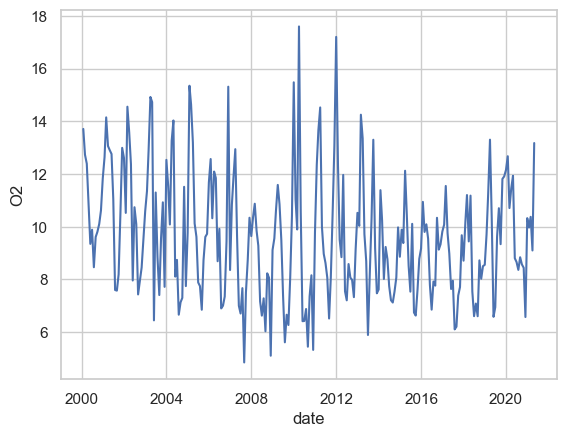

In [13]:
sns.lineplot(data=df_monthly, x='date', y='O2')

# Correlation heatmap of Water Quality Distribution 

<Axes: >

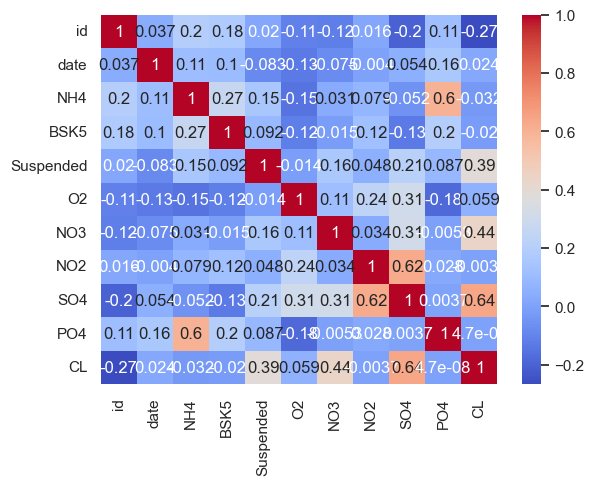

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Distribution of Dissolved Oxygen (O2) Concentration in water Sample

<Axes: xlabel='O2', ylabel='Count'>

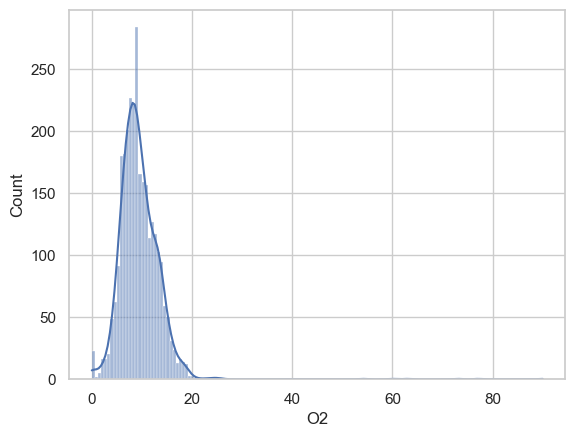

In [15]:
sns.histplot(df['O2'], kde=True)

# Boxplot of Nitrate(NO3)Concentration in Water sample

<Axes: ylabel='NO3'>

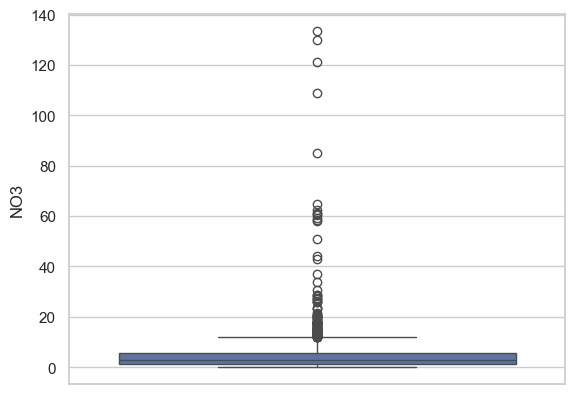

In [16]:
sns.boxplot(data=df, y='NO3')

# Scatter Plot of Nitrate(NO3) vs Dissolved Oxygen (O2) Concentration

<Axes: xlabel='NO3', ylabel='O2'>

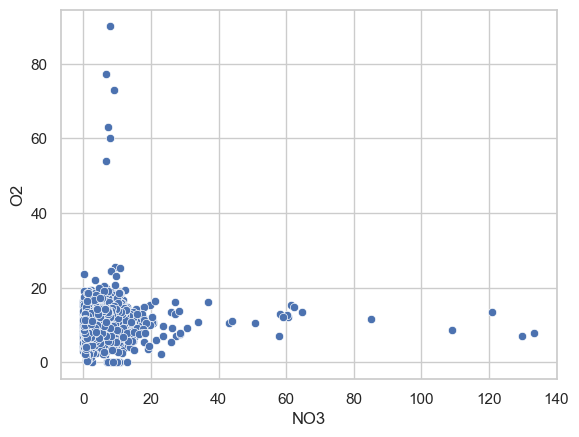

In [17]:
sns.scatterplot(data=df, x='NO3', y='O2')


# Temporal Distribution of NO₃ vs O₂ Concentrations (Colored by Year)

<Axes: xlabel='NO3', ylabel='O2'>

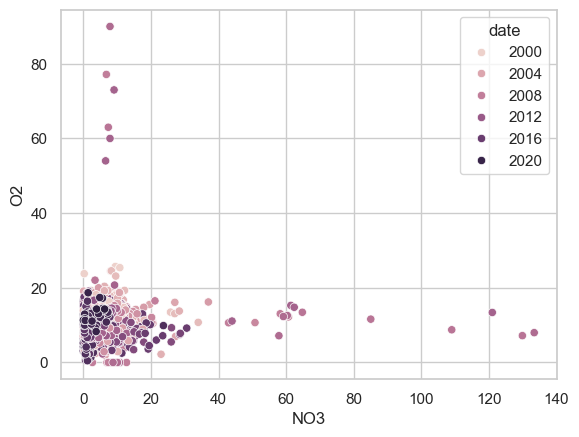

In [18]:
sns.scatterplot(data=df, x='NO3', y='O2', hue=df['date'].dt.year)


# Box Plot of Oxygen vs Month

<Axes: xlabel='month', ylabel='O2'>

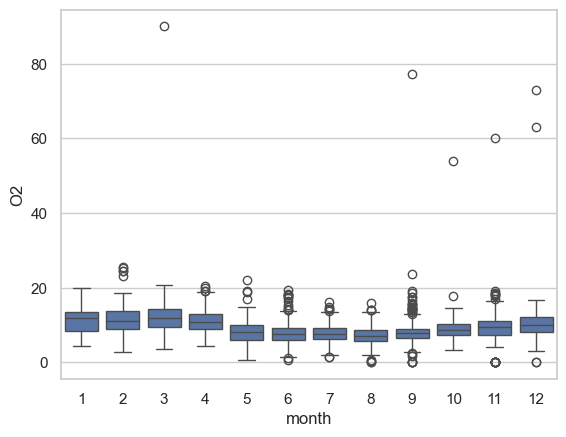

In [19]:
df['month'] = df['date'].dt.month
sns.boxplot(data=df, x='month', y='O2')


# Yearly Average NO3 and O2 Levels in [Location/data Source]

<Axes: xlabel='year'>

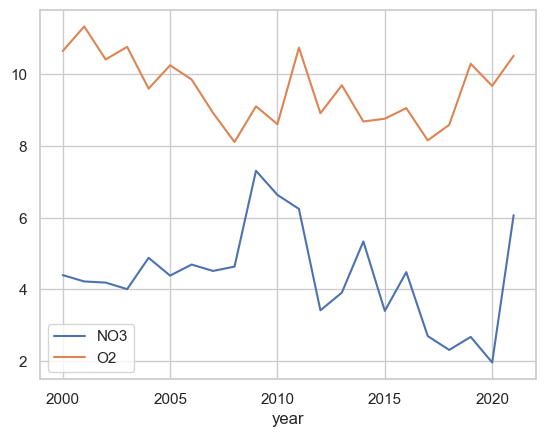

In [20]:
df['year'] = df['date'].dt.year
df.groupby('year')[['NO3', 'O2']].mean().plot()


# Trend of NO3(Nitrate) Concentration over the Years

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
# Group yearly averages
df['year'] = df['date'].dt.year
yearly = df.groupby('year')[['O2', 'NO3', 'NH4']].mean().reset_index()


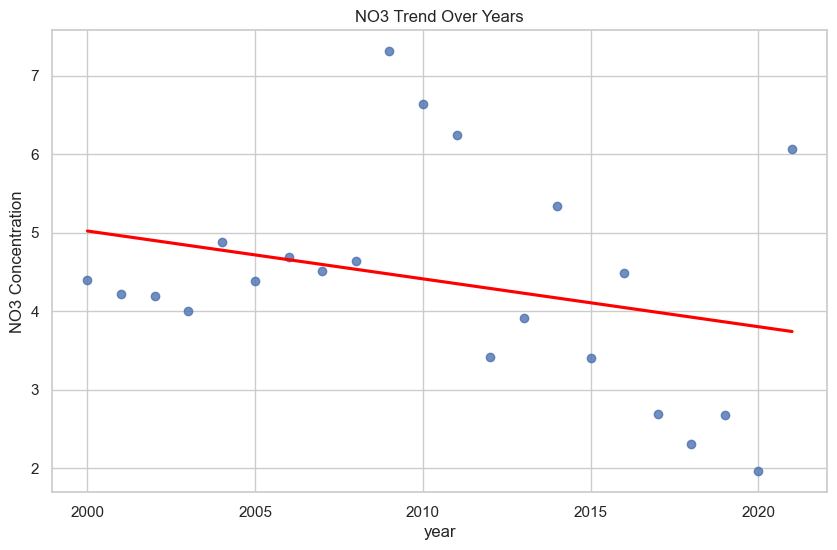

In [25]:
# Trendline plot using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(data=yearly, x='year', y='NO3', order=1, ci=None, line_kws={'color': 'red'})
plt.title('NO3 Trend Over Years')
plt.ylabel('NO3 Concentration')
plt.show()

# Seasonal Decomposition of O2(Oxygen)concentration data over time

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [29]:
# Monthly average time series
monthly = df.set_index('date').resample('M').mean()



C:\Users\Admin\AppData\Local\Temp\ipykernel_9884\1805845026.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('date').resample('M').mean()


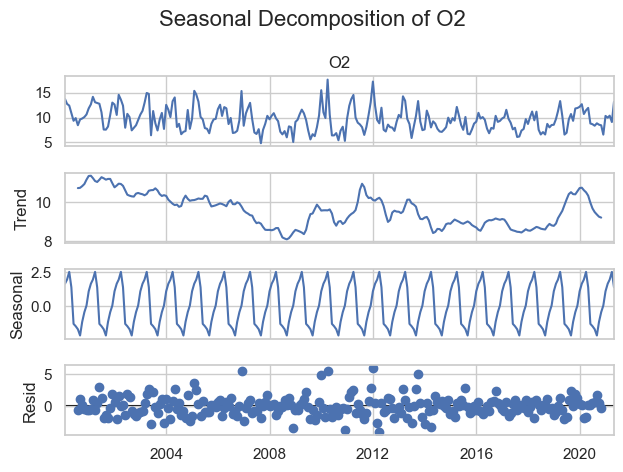

In [30]:
# Seasonal decomposition for O2
result = seasonal_decompose(monthly['O2'].dropna(), model='additive', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of O2', fontsize=16)
plt.tight_layout()
plt.show()

# Water Quality Clustering

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [32]:
# Select features for clustering
features = ['O2', 'NO3', 'NH4', 'SO4', 'PO4', 'CL']
X = df[features].dropna()


In [33]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_scaled)

In [35]:
# Add cluster labels
df_clustered = df.loc[X.index].copy()
df_clustered['Cluster'] = labels

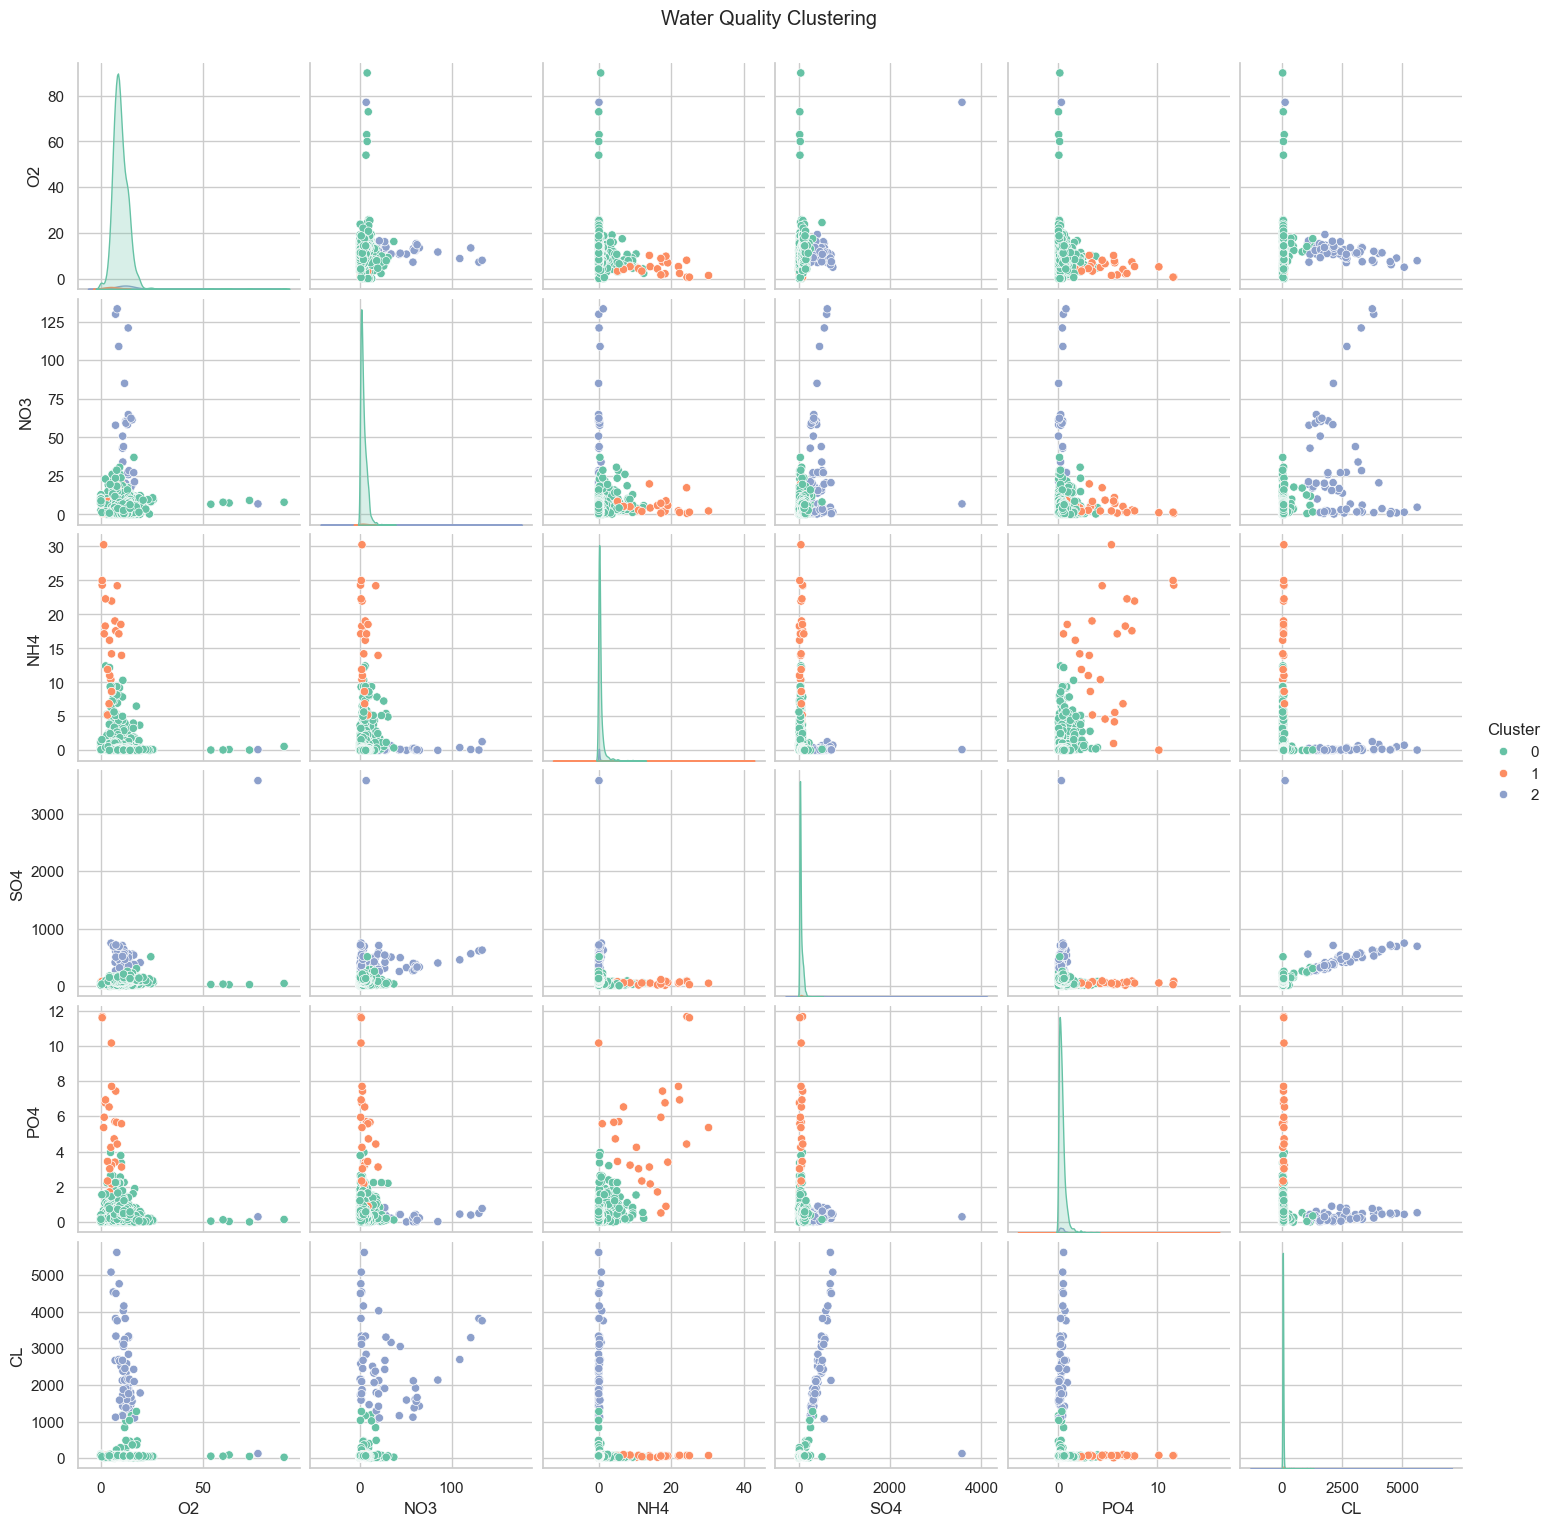

In [37]:
# Plot clusters
sns.pairplot(df_clustered, vars=features, hue='Cluster', palette='Set2')
plt.suptitle('Water Quality Clustering', y=1.02)
plt.show()

# O2 Time Series with Anomalies

In [38]:
from scipy.stats import zscore

In [39]:
# Compute z-scores
df['O2_zscore'] = zscore(df['O2'].dropna())
threshold = 3  # change as needed
anomalies = df[abs(df['O2_zscore']) > threshold]


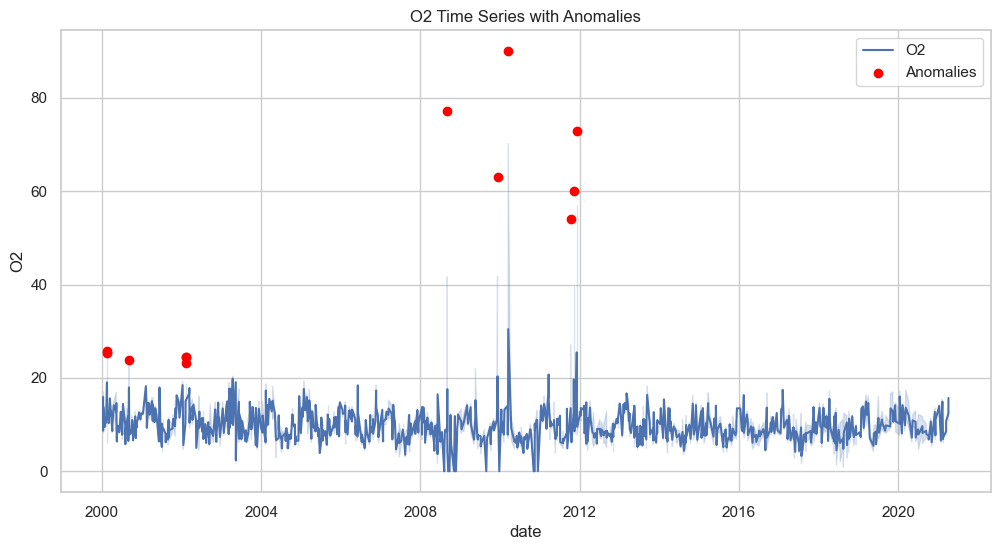

In [41]:
# Plot anomalies
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='O2', label='O2')
plt.scatter(anomalies['date'], anomalies['O2'], color='red', label='Anomalies')
plt.title('O2 Time Series with Anomalies')
plt.legend()
plt.show()

# Water Quality Index Over Time

In [42]:
# Normalize parameters (0 to 1)
params = ['O2', 'NO3', 'NH4', 'PO4', 'CL']
df_norm = df.copy()
df_norm[params] = (df[params] - df[params].min()) / (df[params].max() - df[params].min())


In [43]:
# Simple average WQI
df_norm['WQI'] = df_norm[params].mean(axis=1)


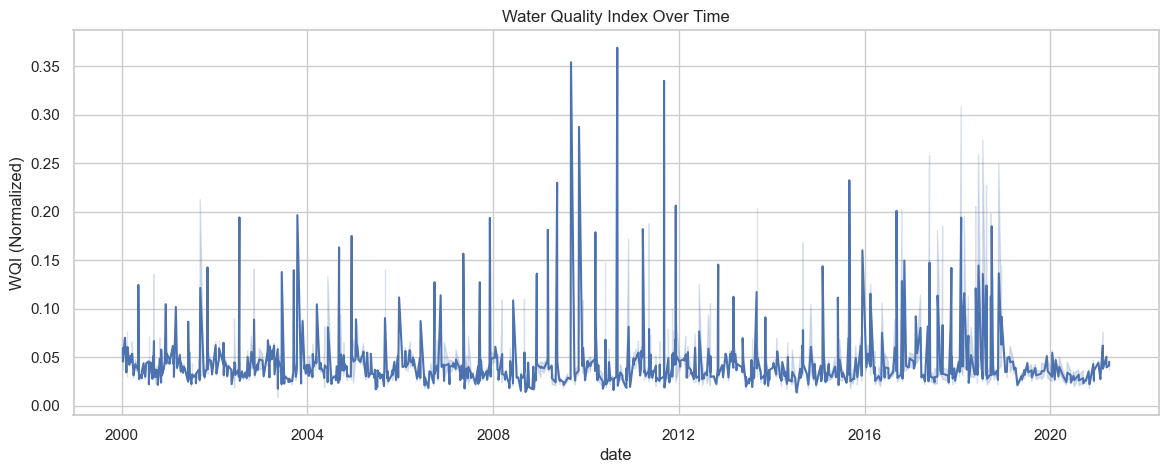

In [44]:
# Plot WQI over time
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_norm, x='date', y='WQI')
plt.title('Water Quality Index Over Time')
plt.ylabel('WQI (Normalized)')
plt.show()

# NO3 Prediction Using Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
# Use date ordinal as X for time series prediction
df_lr = df[['date', 'NO3']].dropna()
df_lr['date_ordinal'] = df_lr['date'].map(pd.Timestamp.toordinal)


In [47]:
X = df_lr[['date_ordinal']]
y = df_lr['NO3']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [50]:
# Predict and plot
y_pred = model.predict(X_test)


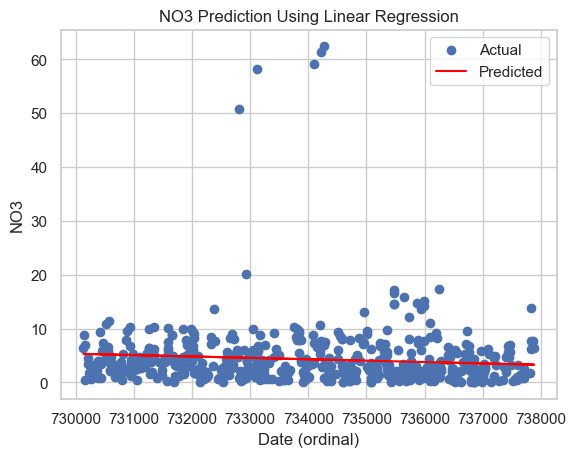

In [51]:
plt.scatter(X_test['date_ordinal'], y_test, label='Actual')
plt.plot(X_test['date_ordinal'], y_pred, color='red', label='Predicted')
plt.title('NO3 Prediction Using Linear Regression')
plt.xlabel('Date (ordinal)')
plt.ylabel('NO3')
plt.legend()
plt.show()